In [1]:
import os

import pickle
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.figsize'] = (16, 8)
matplotlib.rcParams['figure.dpi'] = 200

In [2]:
exp_path = os.path.join("pickle", "rand_l10_w6_n1000", "np6.pkl")
with open(exp_path, "rb") as f:
    exp = pickle.load(f)

Text(0, 0.5, 'Graph Execution Time (s)')

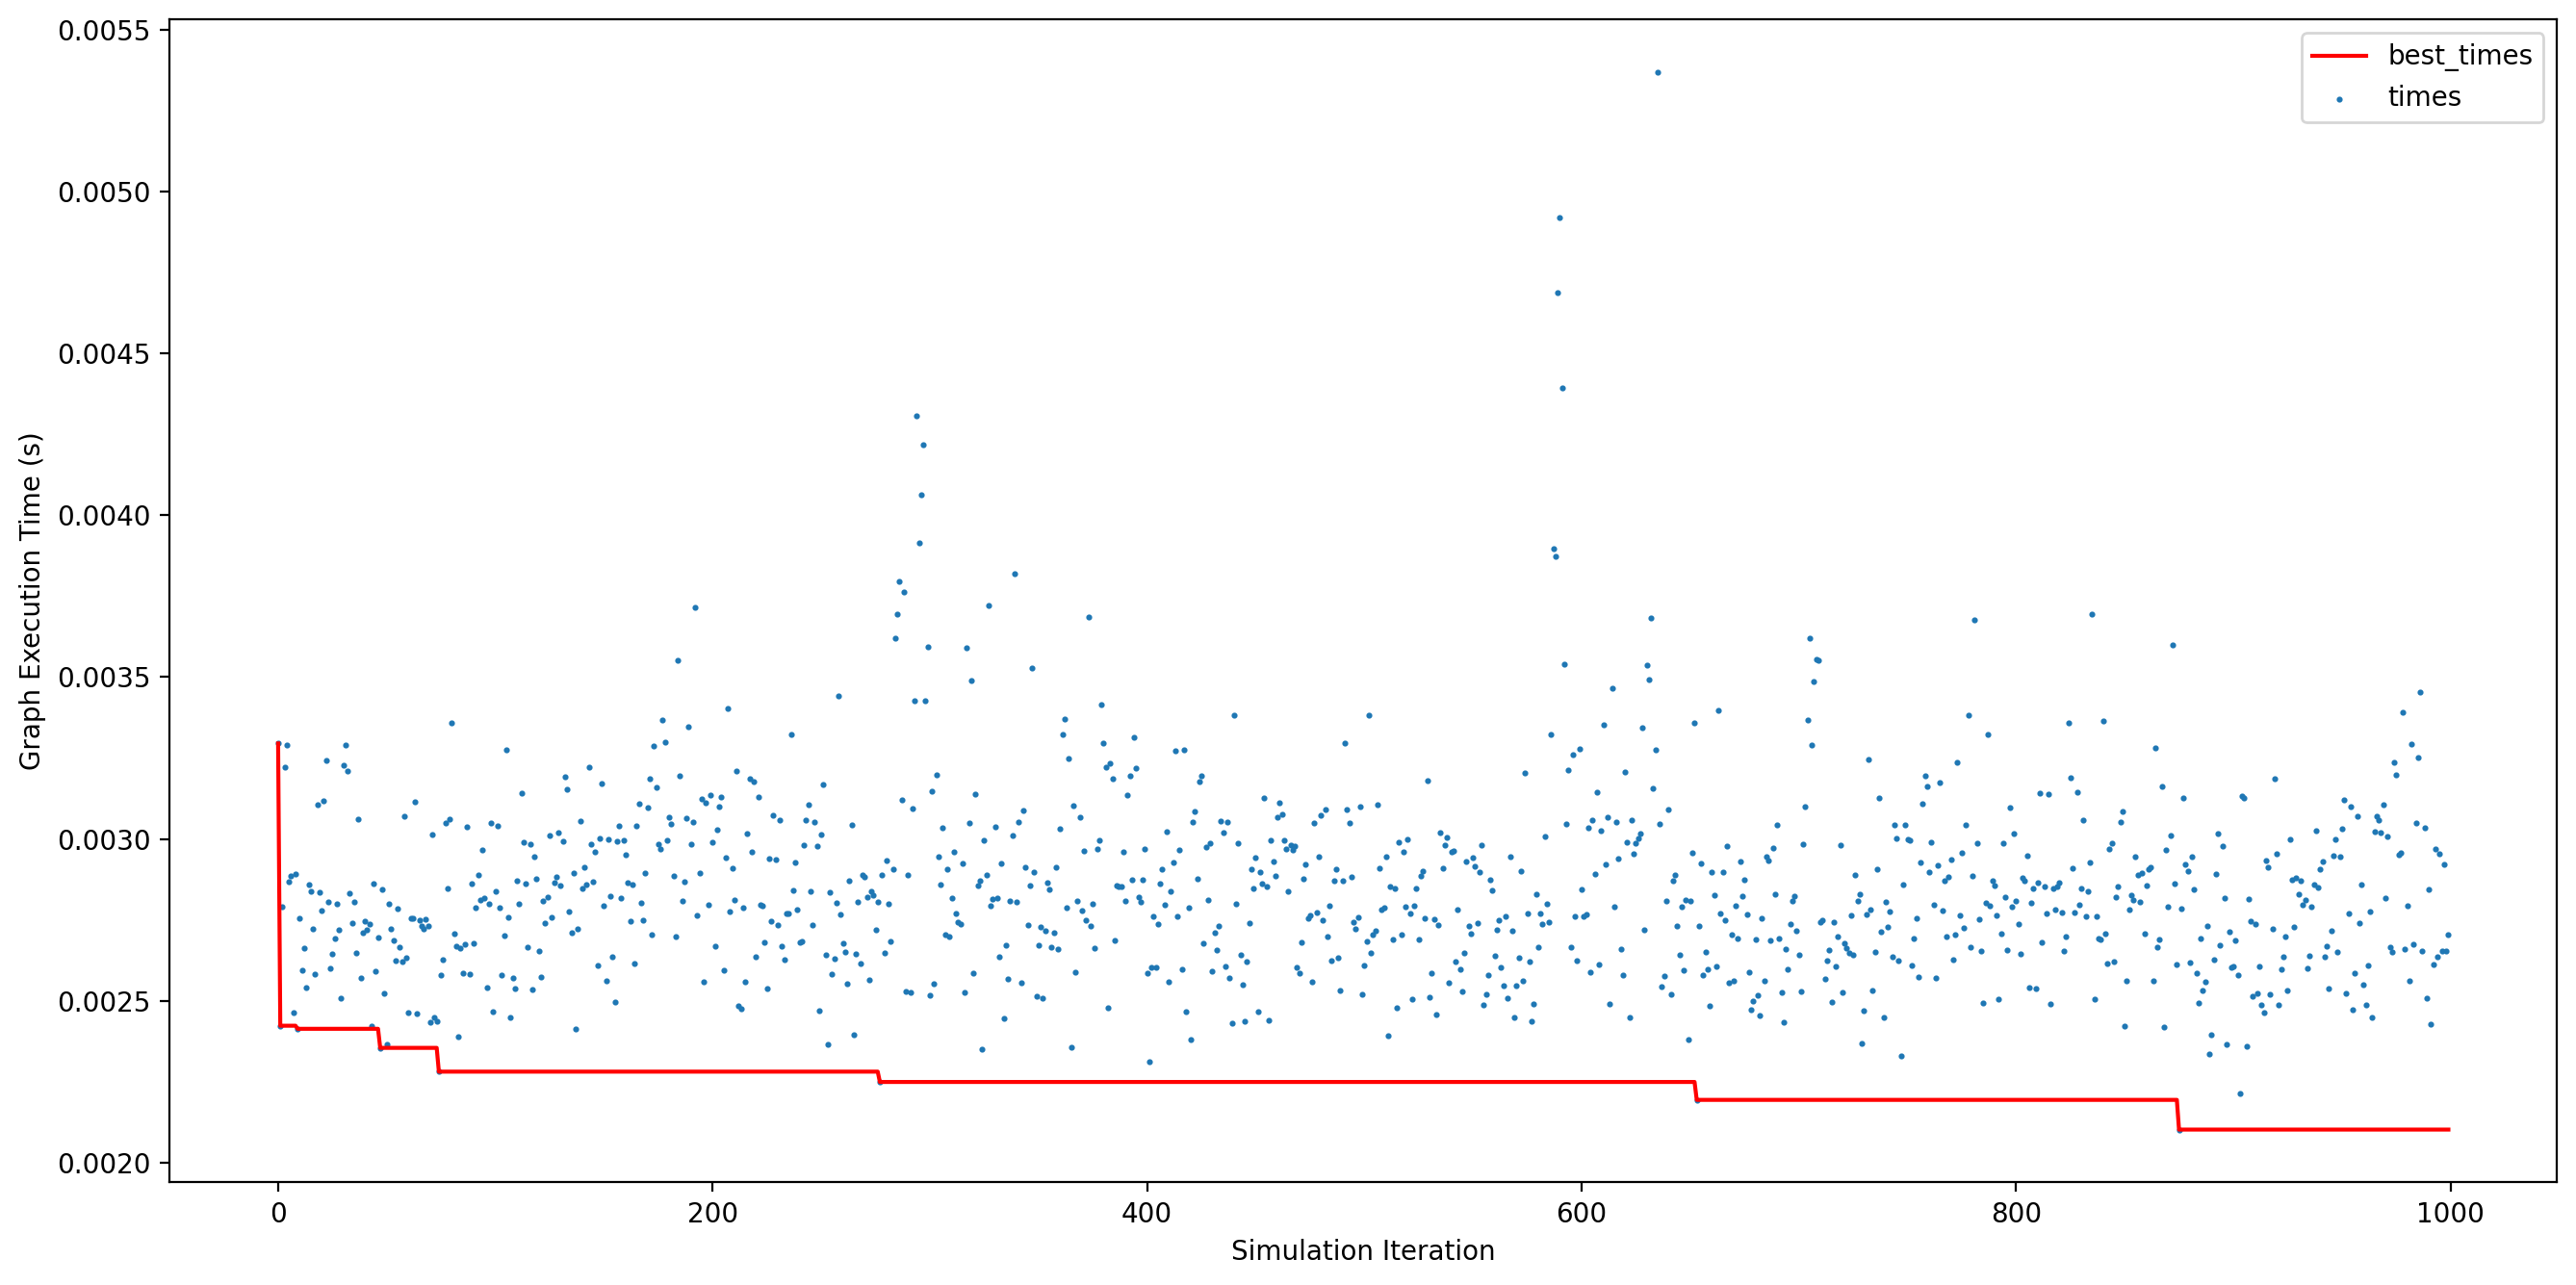

In [3]:
# Plot results over iterations
times = exp["results"]["times"]
best_times = exp["results"]["best_times"]
plt.scatter(np.arange(len(times)), times, s=1.5, label="times")
plt.plot(best_times, "-r", label="best_times")
plt.legend(loc="best")
plt.xlabel("Simulation Iteration")
plt.ylabel("Graph Execution Time (s)")
# plt.savefig("results_over_iters.png", dpi=200)

Text(0, 0.5, 'Graph Execution Time (s)')

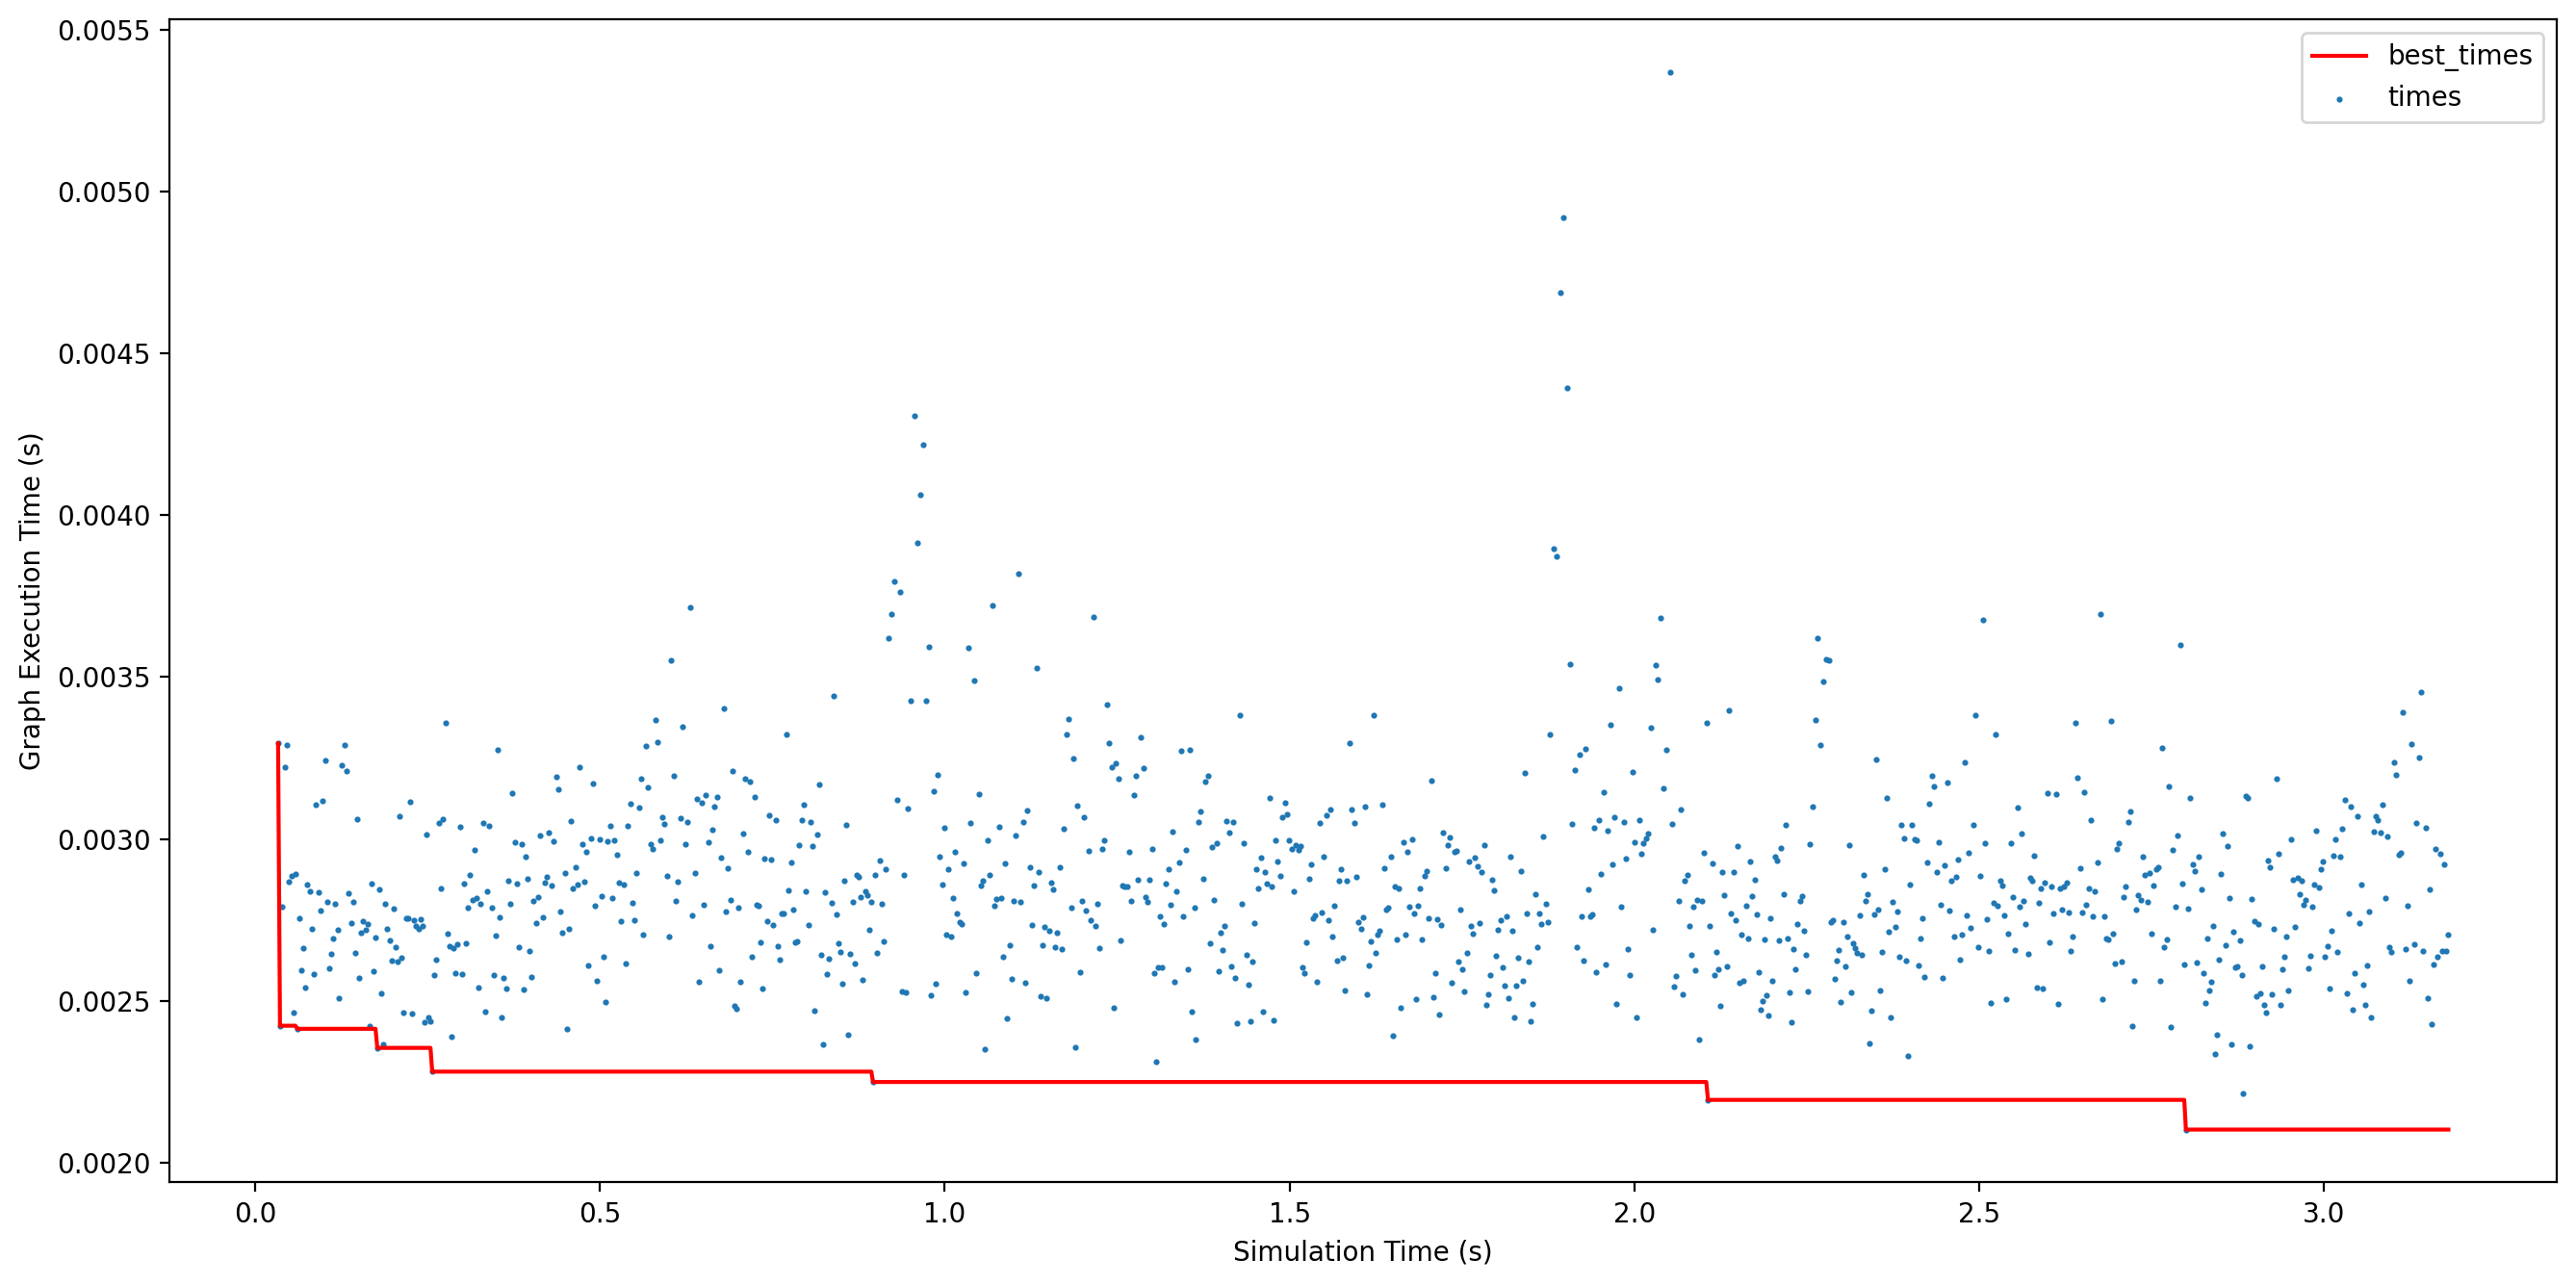

In [4]:
# Plot results over time
times = exp["results"]["times"]
iter_times = exp["results"]["iter_times"]
plt.scatter(iter_times, times, s=1.5, label="times")
plt.plot(iter_times, best_times, "-r", label="best_times")
plt.legend(loc="best")
plt.xlabel("Simulation Time (s)")
plt.ylabel("Graph Execution Time (s)")
# plt.savefig("results_over_time.png", dpi=200)